In [7]:
hand_img = '../dataset/W/W_2100.jpg'
model_link = '../model/model_2.h5'

In [8]:
def stt2char(num):
    return chr(int(num) + ord('A'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


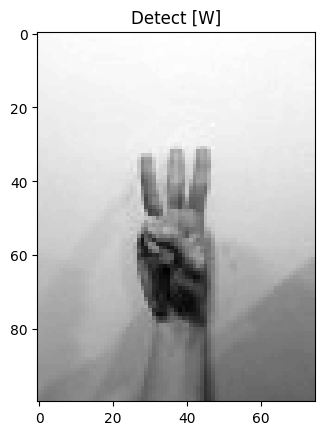

In [9]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = load_model(model_link)

img = cv2.imread(hand_img, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (75, 100))
img = img.reshape(1, 100, 75, 1)
num = np.argmax(model.predict(img), axis=-1)

plt.title(f'Detect [{stt2char(num[0])}]')
plt.imshow(img[0], cmap='gray')

In [10]:
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)




In [11]:
def stt2char(num):
    return chr(int(num) + ord('A'))

In [12]:
cap = cv2.VideoCapture(0)

fps = cap.get(cv2.CAP_PROP_FPS)
time = 1000//30

model = load_model(model_link)

def draw_rec(x_min, y_min, x_max, y_max, frame):
    w = x_max - x_min
    h = y_max - y_min
    cv2.rectangle(frame, (x_min, y_min), (x_min + w, y_min + h), (0, 255, 0), 2)
    
        
def crop_hand(hand_landmarks, frame):
    h, w, _ = frame.shape
    x_min, y_min = w, h
    x_max, y_max = 0, 0
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * w), int(lm.y * h)
        x_min = min(x, x_min)
        y_min = min(y, y_min)
        x_max = max(x, x_max)
        y_max = max(y, y_max)
    
    
    frame_cp = frame.copy()
    draw_rec(x_min, y_min, x_max, y_max, frame)
    
    
    _w = max(x_max - x_min, 1)   
    _h = max(y_max - y_min, 1) 
    
    
    
    scale = (_h/_w)*0.75
    
    new_w = int(np.ceil(_w*scale))
    new_h = int(np.ceil(_h/scale))
    if scale > 1.0:
        new_h = _h
    else: 
        new_w = _w
    
    new_w = int(np.ceil(new_w + 0.3*180))
    new_h = int(np.ceil(new_h + 0.4*180))
    print((new_w, new_h), new_w/new_h)
    
    y_offset = abs(new_h - _h)//2
    x_offset = abs(new_w - _w)//2
    
    x_min = max(0, x_min - x_offset)
    y_min = max(0, y_min - y_offset)
    x_max = min(w, x_max + x_offset)
    y_max = min(h, y_max + y_offset)
    img = cv2.cvtColor(frame_cp, cv2.COLOR_BGR2GRAY)
    img_crop = img[y_min:y_max, x_min:x_max]
    img_resize = cv2.resize(img_crop, (75, 100))
    cv2.imshow('crop', img_resize)
    img_resize = np.expand_dims(img_resize, axis=-1)
    return np.array([img_resize])

    
while True:
    ret, frame = cap.read()
    if not ret:
        print("Camera is not allow!")
        break
    
    # frame = cv2.flip(frame, 1)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    result = hands.process(frame_rgb)
    
    if result.multi_hand_landmarks and result.multi_handedness:
        hand_landmarks = result.multi_hand_landmarks[0]
        handedness = result.multi_handedness[0].classification[0].label
        if handedness == 'Left':
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            hand_crop = crop_hand(hand_landmarks, frame)
            
            res = model.predict(hand_crop)
            char = stt2char(np.argmax(res, axis=-1))
            cv2.putText(frame, char, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)
            
    
    
    
    cv2.namedWindow('camera', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('camera', 400, 300)
    cv2.imshow('camera', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

(243, 324) 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
(241, 320) 0.753125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(236, 314) 0.7515923566878981


C:\Users\nhann\AppData\Local\Temp\ipykernel_14016\3067143298.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return chr(int(num) + ord('A'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
(228, 304) 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(231, 307) 0.752442996742671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
(231, 307) 0.752442996742671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
(235, 312) 0.7532051282051282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
(234, 312) 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
(234, 311) 0.752411575562701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
(234, 311) 0.752411575562701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
(236, 314) 0.7515923566878981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(235, 313) 0.7507987220447284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(237, 315) 0.7523809523809524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(234, 312) 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
(233, 310) 0.7516129032258064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(230, 306) 0.7516339869281046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(228, 304) 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(222, 295) 0.752542372881356
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(21